In [26]:
import pandas as pd
df = pd.read_csv('D:/Dissertation/Dataset/Analysis/modelip_withounknown.csv')

In [27]:
import numpy as np

In [28]:
df.columns

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'propulsion_code',
       'Safety Rating', 'engine_capacity_cc', 'age_of_vehicle'],
      dtype='object')

In [29]:
filtered_df = df[
    (df['road_type'] != 9) &
    (df['junction_detail'] != 99) &
    (df['pedestrian_crossing_human_control'] != 9) &
    (df['pedestrian_crossing_physical_facilities'] != 9) &
    (df['weather_conditions'] != 9) &
    (df['road_surface_conditions'] != 9) &
    (df['special_conditions_at_site'] != 9) &
    (df['carriageway_hazards'] != 9) &
    (df['towing_and_articulation'] != 9) &
    (df['vehicle_manoeuvre'] != 99) &
    (df['vehicle_direction_from'] != 9) &
    (df['vehicle_direction_to'] != 9) &
    (df['vehicle_location_restricted_lane'] != 9) &
    (df['junction_location'] != 9) &
    (df['skidding_and_overturning'] != 9) &
    (df['hit_object_in_carriageway'] != 99) &
    (df['vehicle_leaving_carriageway'] != 9) &
    (df['hit_object_off_carriageway'] != 99) &
    (df['first_point_of_impact'] != 9) &
    (df['vehicle_left_hand_drive'] != 9) &
    (df['sex_of_driver'] != 3)
]


In [30]:
# Get the row count before removing rows with null values
row_count_before = df.shape[0]


# Get the row count after removing rows with null values
row_count_after = filtered_df.shape[0]

# Print the row counts
print(f"Row Count Before: {row_count_before}")
print(f"Row Count After: {row_count_after}")


Row Count Before: 165213
Row Count After: 138599


In [31]:
filtered_df.to_csv('D:/Dissertation/Dataset/Analysis/modelip_wofeaturename.csv')

In [5]:
import pandas as pd
data = pd.read_csv('D:/Dissertation/Dataset/Analysis/modelip_wofeaturename.csv')

In [6]:
data['age_of_vehicle'] = pd.Categorical(data['age_of_vehicle'], categories=ordered_categories, ordered=True)

# Generate the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='accident_severity', y='age_of_vehicle', data=data, order=["Slight", "Serious", "Fatal"])
plt.title('Box Plot of Vehicle Age by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Age')
plt.show()

NameError: name 'ordered_categories' is not defined

In [12]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Assume 'encoded_df' is your encoded DataFrame and 'accident_severity' is the target variable
X = df.drop('accident_severity', axis=1)  # Feature Matrix
y = df['accident_severity']  # Target Variable

# Apply the Chi-Squared test
chi_scores = chi2(X, y)

# The chi_scores result contains two arrays:
# 1) chi-squared values
# 2) p-values
chi2_values = pd.Series(chi_scores[0], index=X.columns)
p_values = pd.Series(chi_scores[1], index=X.columns)

# You can print these to understand which features are the most relevant
print("Chi2 Values:")
print(chi2_values.sort_values(ascending=False))

print("\nP-Values:")
print(p_values.sort_values(ascending=True))

# To select the top 'k' features based on Chi-Squared values
k = 'all'  # you can choose any number that's appropriate for your dataset
top_k_features = SelectKBest(chi2, k=k).fit(X, y)

# Get the indices sorted by most important to least important
indices = np.argsort(top_k_features.scores_)[::-1]

top_k_features = SelectKBest(chi2, k=k).fit(X, y)

# Get the names of the selected feature names directly
selected_features = X.columns[top_k_features.get_support()]

print("\nSelected features are:")
print(selected_features)


Chi2 Values:
speed_limit                                8380.313363
hit_object_off_carriageway                 3586.573193
vehicle_leaving_carriageway                3501.664158
vehicle_manoeuvre                          2543.064646
skidding_and_overturning                   1370.301301
junction_location                           956.004285
number_of_casualties                        890.846832
junction_detail                             827.014852
light_conditions                            745.753578
pedestrian_crossing_physical_facilities     439.786941
urban_or_rural_area                         238.259959
hit_object_in_carriageway                   190.342822
road_type                                   161.707744
first_point_of_impact                       113.081104
vehicle_location_restricted_lane             97.150788
first_road_class                             80.960323
number_of_vehicles                           71.271611
journey_purpose_of_driver                    49.7060

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df is your DataFrame
cramers_values = {}
target = 'accident_severity'
for column in df.columns:
    if column != target:
        cramers_values[column] = cramers_v(df[column], df[target])

# Sorting the variables by Cramér's V value
sorted_cramers = sorted(cramers_values.items(), key=lambda x: x[1], reverse=True)

for column, value in sorted_cramers:
    print(f"{column}: {value}")


number_of_casualties: 0.09082849104969613
vehicle_manoeuvre: 0.08914490641869116
number_of_vehicles: 0.08841104988766962
speed_limit: 0.0866142178713308
urban_or_rural_area: 0.07104231849675531
first_point_of_impact: 0.0701890119894669
vehicle_leaving_carriageway: 0.0669487534539436
light_conditions: 0.06333684345202094
junction_detail: 0.06128644603908324
hit_object_off_carriageway: 0.058453964872011786
junction_location: 0.057894586565898395
journey_purpose_of_driver: 0.0537550515910511
skidding_and_overturning: 0.04826753692237248
sex_of_driver: 0.0447359380629788
road_type: 0.04101431790525949
vehicle_type: 0.03264642035793511
pedestrian_crossing_physical_facilities: 0.027332880236862988
first_road_class: 0.027084669348028785
hit_object_in_carriageway: 0.017596864046241993
engine_capacity_cc: 0.01759444632874089
carriageway_hazards: 0.015037175492834657
weather_conditions: 0.014981484171174472
special_conditions_at_site: 0.01380582053680254
vehicle_direction_from: 0.013214929073380

In [16]:
#  correlation matrix
correlation_matrix = df.corr()

threshold_correlation = 0.5

# Identify pairs of features that have correlation higher than the threshold
highly_correlated_pairs = {}
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if (abs(correlation_matrix[column][index]) > threshold_correlation) & (column != index):
            if column not in highly_correlated_pairs:
                highly_correlated_pairs[column] = []
            highly_correlated_pairs[column].append(index)

print("Pairs of highly correlated features:")
for key, values in highly_correlated_pairs.items():
    for value in values:
        print(f"{key} and {value}")


Pairs of highly correlated features:
speed_limit and urban_or_rural_area
urban_or_rural_area and speed_limit
vehicle_leaving_carriageway and hit_object_off_carriageway
hit_object_off_carriageway and vehicle_leaving_carriageway


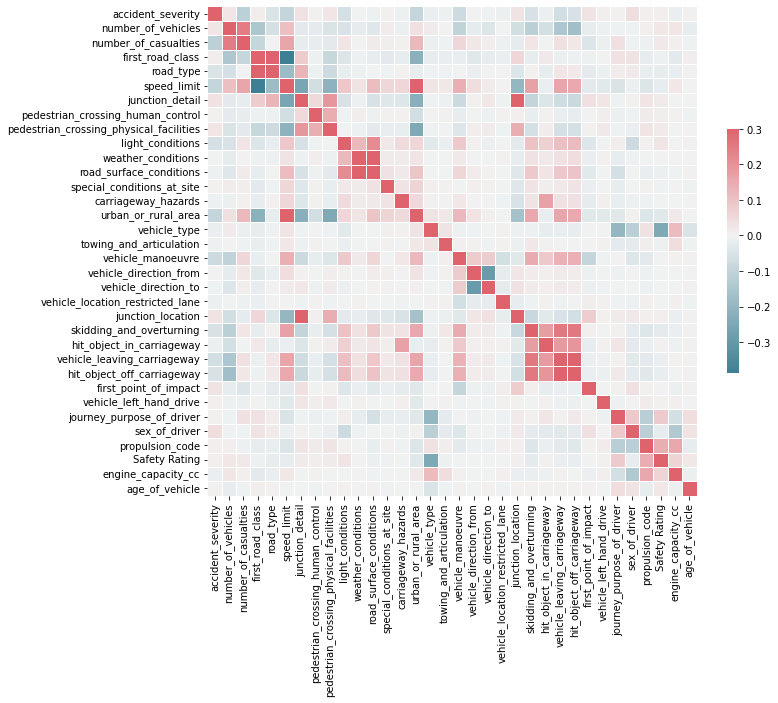

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# For displaying frequency distribution as a table
for column in df.columns:
    print(f"Frequency distribution for {column}:\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")



Frequency distribution for accident_severity:

3    111036
2     25525
1      2038
Name: accident_severity, dtype: int64

--------------------------------------------------

Frequency distribution for number_of_vehicles:

2     90283
1     21717
3     18698
4      5302
5      1656
6       567
7       228
8        91
9        25
10       18
11       14
Name: number_of_vehicles, dtype: int64

--------------------------------------------------

Frequency distribution for number_of_casualties:

1     99099
2     26352
3      8505
4      2913
5      1105
6       352
7       173
8        63
10       13
9        12
11       11
19        1
Name: number_of_casualties, dtype: int64

--------------------------------------------------

Frequency distribution for first_road_class:

3    64173
6    44547
4    17865
5     6027
1     5443
2      544
Name: first_road_class, dtype: int64

--------------------------------------------------

Frequency distribution for road_type:

6    101207
3     24968
1

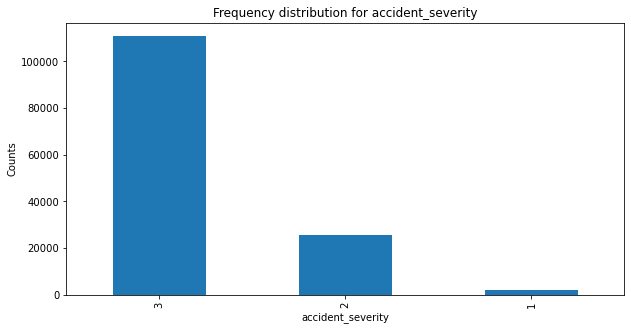

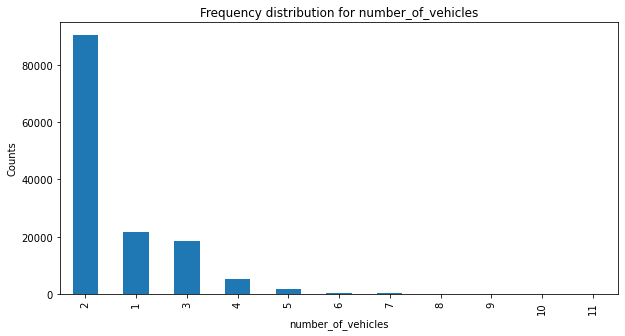

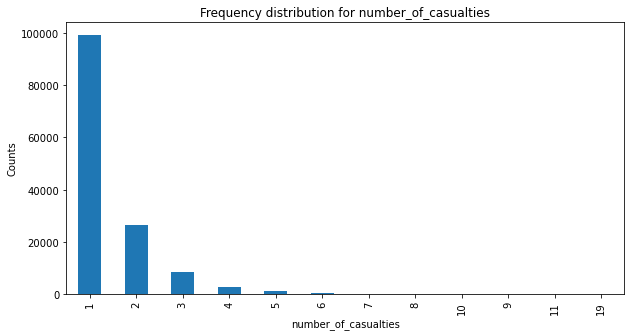

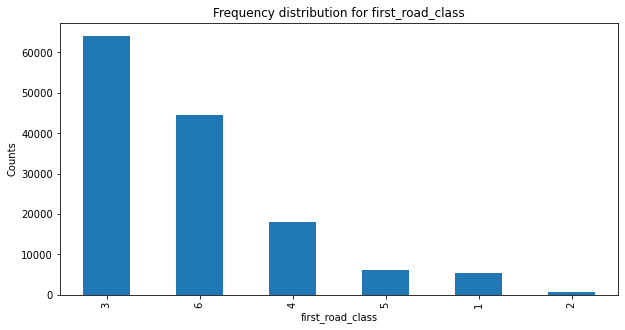

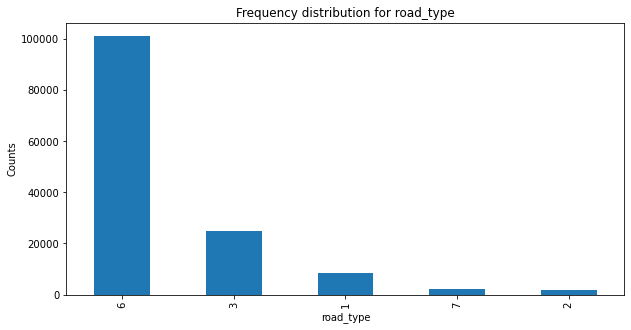

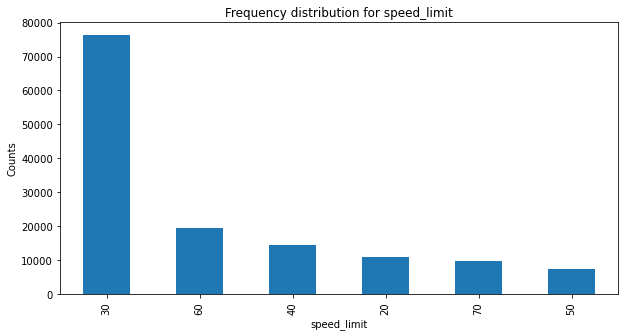

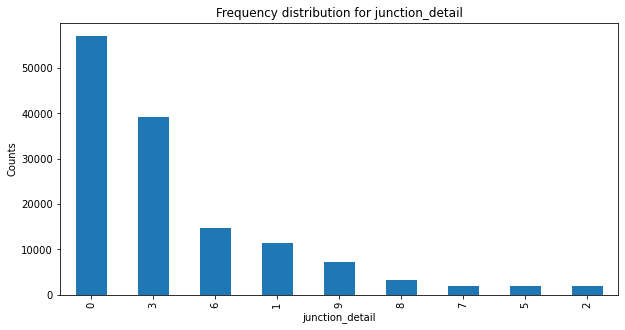

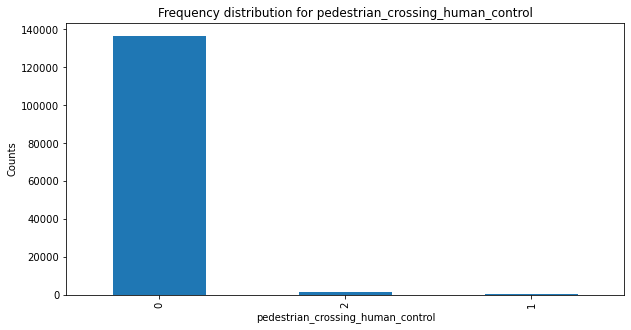

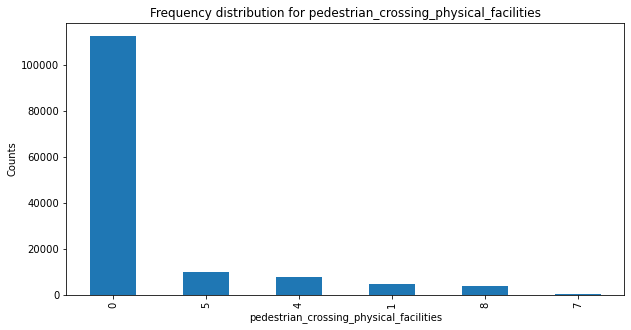

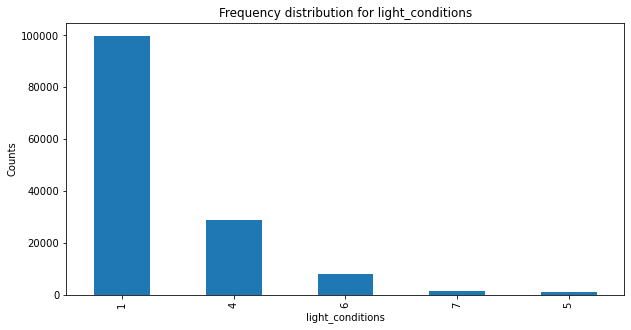

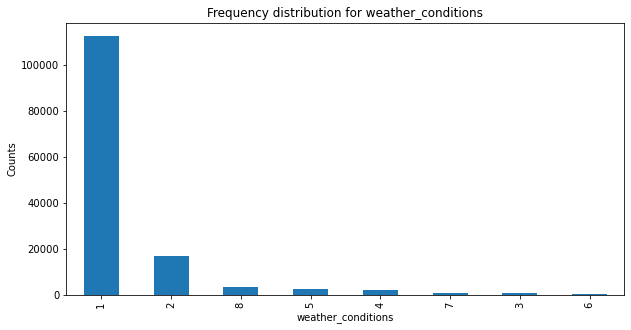

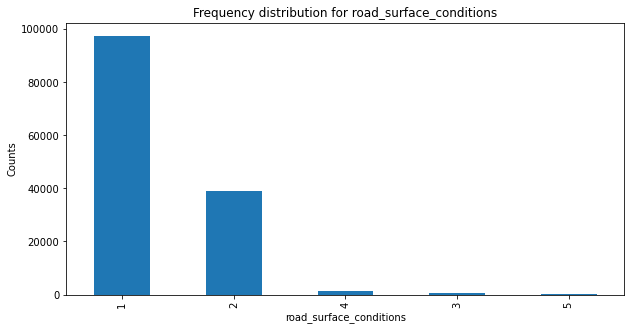

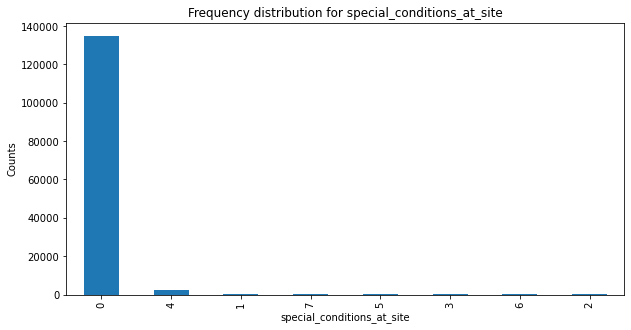

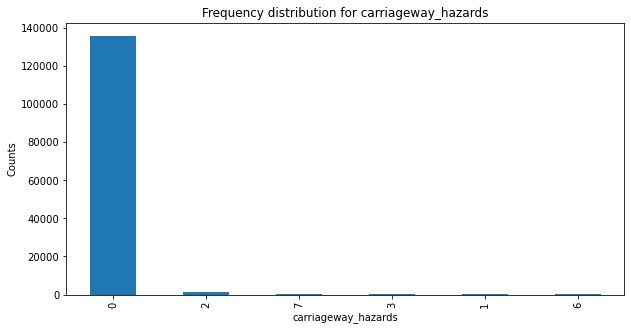

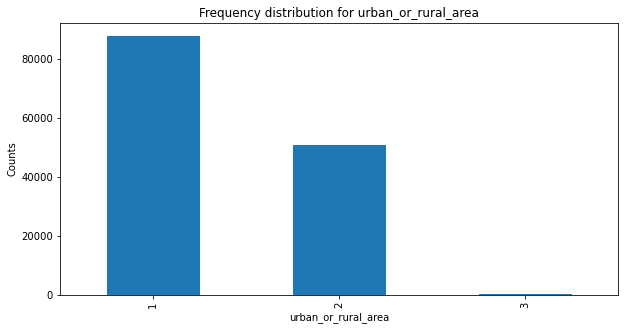

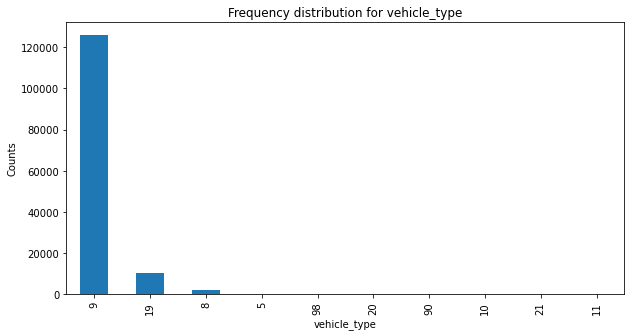

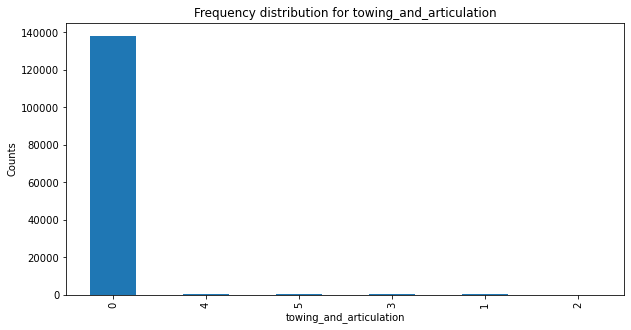

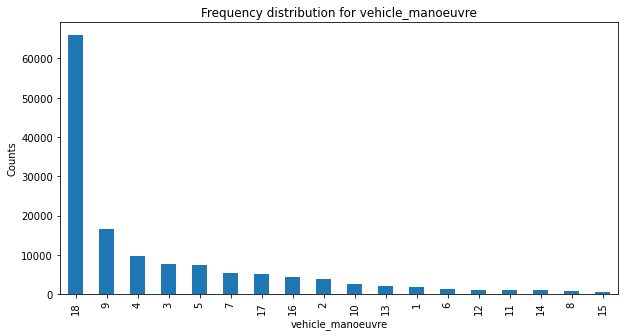

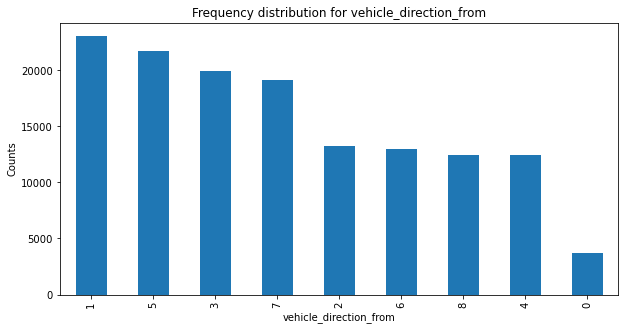

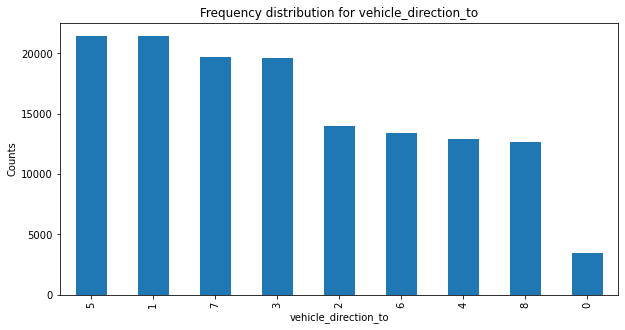

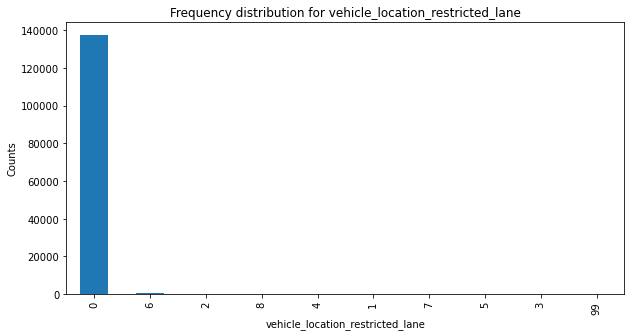

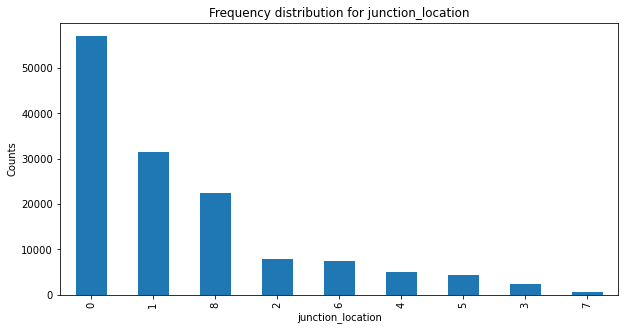

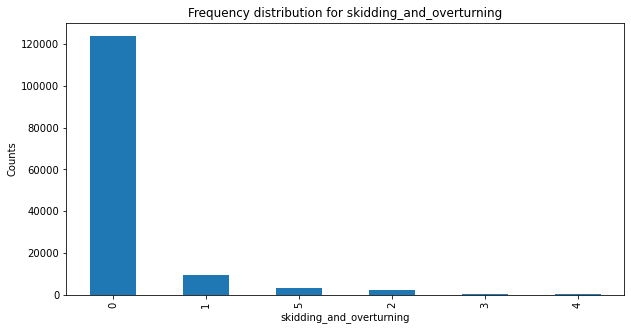

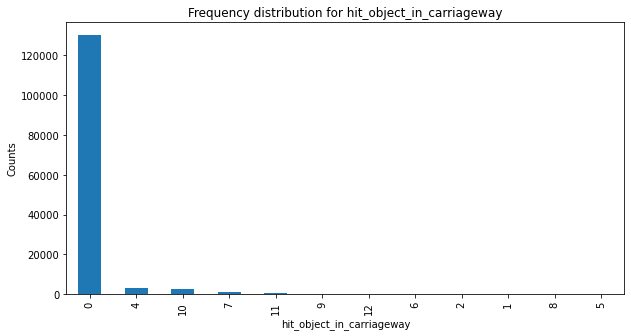

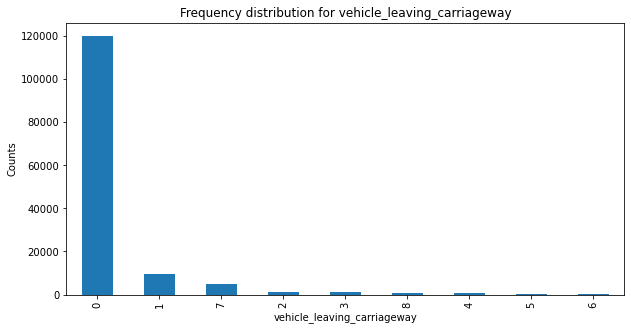

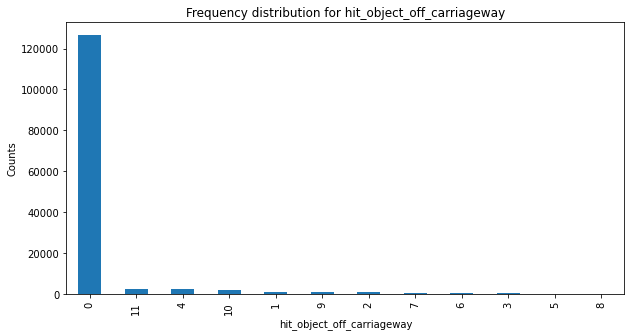

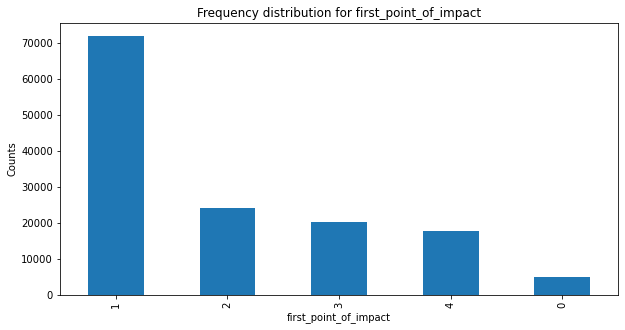

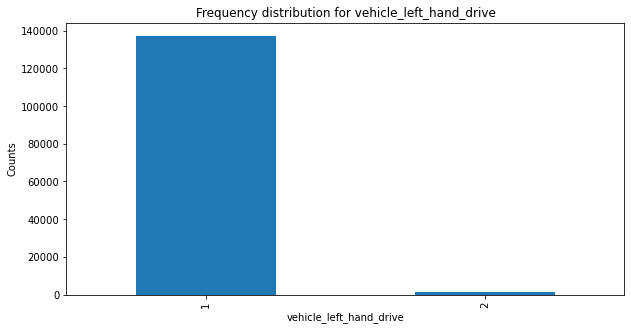

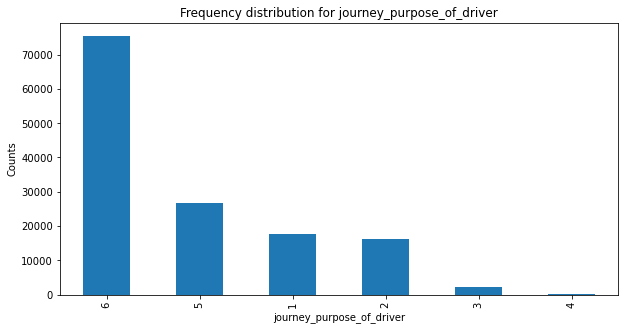

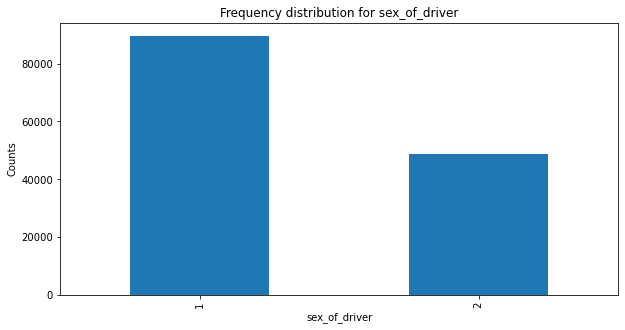

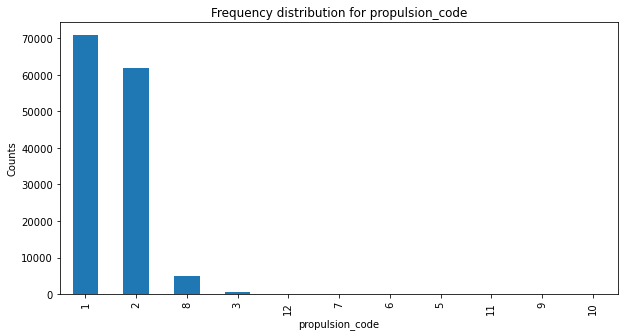

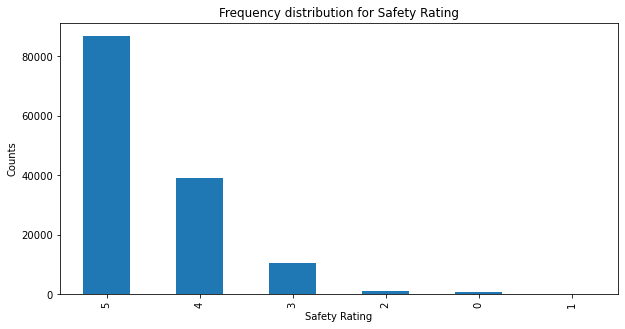

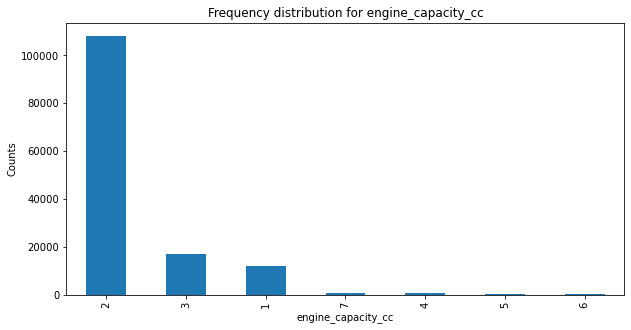

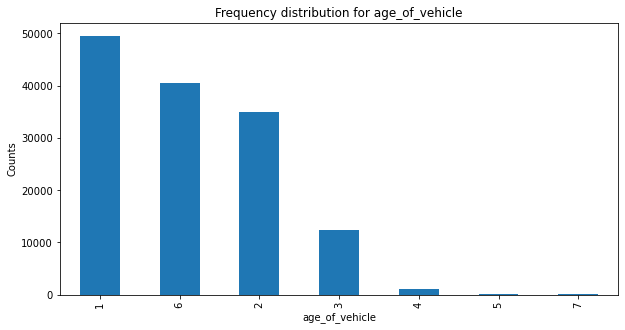

In [23]:
# For visual representation using bar plots
for column in df.columns:
    df[column].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Frequency distribution for {column}")
    plt.ylabel('Counts')
    plt.xlabel(column)
    plt.show()

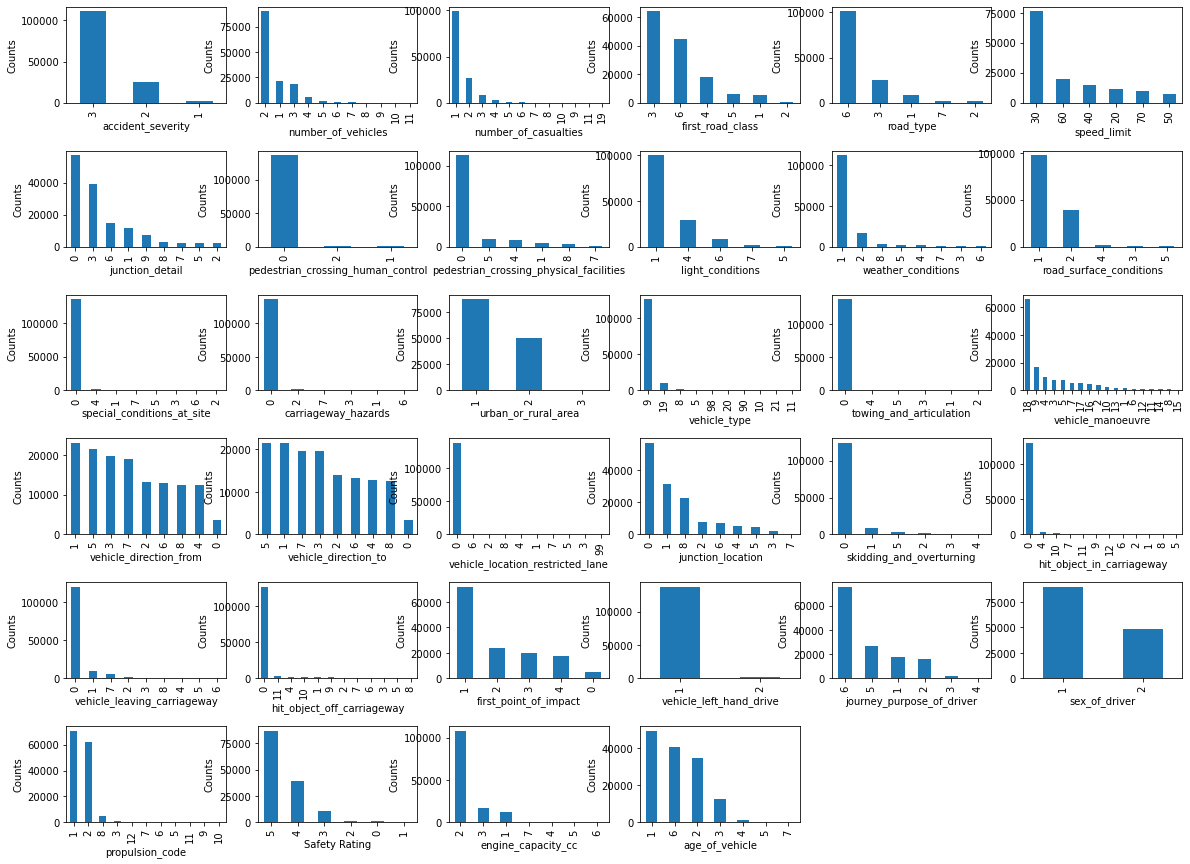

In [6]:
import matplotlib.pyplot as plt
# Number of columns in the dataframe
n = len(df.columns)

# Calculate number of rows and columns for the subplots
cols = 6  # Define the number of columns for subplots
rows = (n // cols) + (n % cols > 0)  # Calculate the number of rows required

# Set up the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust the space between plots

# Check if axes is a single dimensional array, make it 2D for uniform handling
if axes.ndim == 1:
    axes = axes.reshape(1, -1)

# Plot the bar plots on each subplot
for idx, column in enumerate(df.columns):
    row_idx, col_idx = divmod(idx, cols)
    df[column].value_counts().plot(kind='bar', ax=axes[row_idx, col_idx])
#     axes[row_idx, col_idx].set_title(f"Frequency distribution for {column}")
    axes[row_idx, col_idx].set_ylabel('Counts')
    axes[row_idx, col_idx].set_xlabel(column)

# Hide any unused subplots
for idx in range(n, rows*cols):
    row_idx, col_idx = divmod(idx, cols)
    axes[row_idx, col_idx].axis('off')

plt.show()

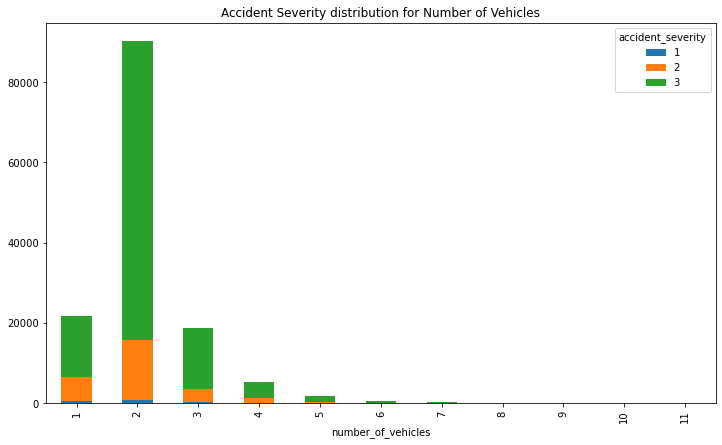

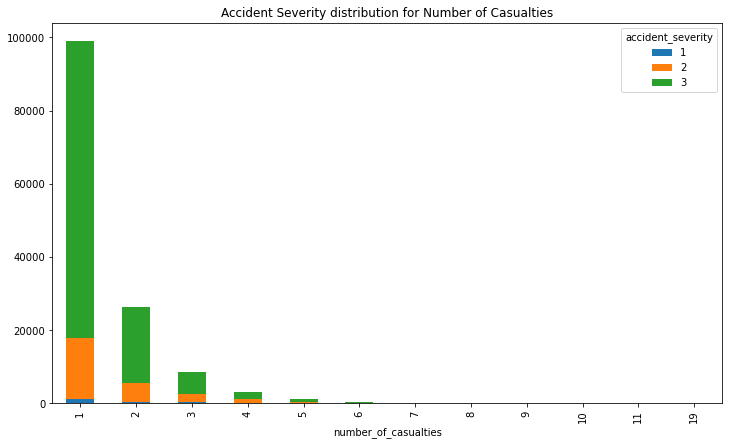

In [25]:
# Stacked bar for accident severity vs number of vehicles
pd.crosstab(df['number_of_vehicles'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Number of Vehicles')
plt.show()

# Stacked bar for accident severity vs number of casualties
pd.crosstab(df['number_of_casualties'], df['accident_severity']).plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Accident Severity distribution for Number of Casualties')
plt.show()


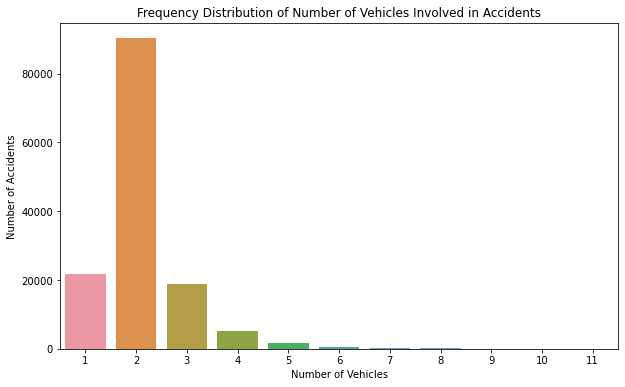

In [8]:
import seaborn as sns
# Frequency distribution of number_of_vehicles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_of_vehicles')
plt.title('Frequency Distribution of Number of Vehicles Involved in Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Number of Vehicles')
plt.show()


<Figure size 1008x576 with 0 Axes>

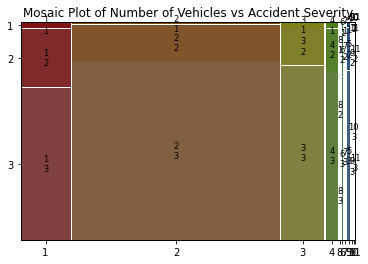

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot for number_of_vehicles vs accident_severity
plt.figure(figsize=(14, 8))
mosaic(df, ['number_of_vehicles', 'accident_severity'], title='Mosaic Plot of Number of Vehicles vs Accident Severity')
plt.show()
